In [1]:
# Cálculo de curvas h - a - d.

import numpy as np
import pandas as pd

from scipy import spatial

from matplotlib import pyplot as plt

import geopandas as gpd
import shapely as shp

In [2]:
# Dirección de los datos.
path = "../Material/Clases/Examen 1/"

# Datos de las estaciones..
estaciones_n = "ESTACIONES_NOROESTE.csv"

In [3]:
# Cargamos la lista de estaciones.
Estaciones = pd.read_csv(path + estaciones_n)

# Nombres de archivos
Estaciones["ARCHIVO"] = Estaciones["ESTACION"].apply(
    lambda x: f"Estacion_{x}__90_dias.csv" )

# Creamos un punto con las coordenadas.
Estaciones["geometry"] = None
Estaciones["geometry"] = gpd.points_from_xy(
    Estaciones["LONGITUD"], Estaciones["LATITUD"])

# Creamos un GeoDataFrame.
# Las coordenadas están en WGS84 EPSG:4326.
Estaciones = gpd.GeoDataFrame(Estaciones, geometry = "geometry", crs = 4326)
# A coordenadas Cónica Conforme de Lambert ITRF2008 ESPSG:6372.
CRS = 6372
Estaciones = Estaciones.to_crs(CRS)

# Actualizamos x, y.
Estaciones["x"] = Estaciones.centroid.x
Estaciones["y"] = Estaciones.centroid.y

# Datos.
Estaciones

ESTACION    LATITUD    LONGITUD           ESTADO  \
0                 EJIDO_NUEVO_LEON  32.414440 -115.192500  Baja California   
1                    ISLA_CORONADO  32.415600 -117.248100  Baja California   
2                   ISLA_GUADALUPE  28.882800 -118.293100  Baja California   
3                       LARUMOROSA  32.272222 -116.205556  Baja California   
4                     MEXICALI_EMA  32.666670 -115.457778  Baja California   
5                   PLAYASROSARITO  32.377500 -117.071389  Baja California   
6   PRESAABELARDOLRODRIGUEZTIJUANA  32.447222 -116.908333  Baja California   
7   PRESAEMILIOLOPEZZAMORAENSENADA  31.891389 -116.603333  Baja California   
8                       SAN_FELIPE  31.028050 -114.846660  Baja California   
9                       SANQUINTIN  30.531667 -115.837500  Baja California   
10                          TECATE  32.566670 -116.661389  Baja California   

             MUNICIPIO  ALTITUD  \
0             Mexicali     14.0   
1              Tijuana     76.0   
2             Ensenada     23.0   
3               Tecate   1262.0   
4             Mexicali     14.0   
5   Playas de Rosarito     36.9   
6              Tijuana    156.0   
7             Ensenada     32.0   
8             Mexicali     27.0   
9             Ensenada     32.0   
10              Tecate    583.7   

                                              ARCHIVO  \
0              Estacion_EJIDO_NUEVO_LEON__90_dias.csv   
1                 Estacion_ISLA_CORONADO__90_dias.csv   
2                Estacion_ISLA_GUADALUPE__90_dias.csv   
3                    Estacion_LARUMOROSA__90_dias.csv   
4                  Estacion_MEXICALI_EMA__90_dias.csv   
5                Estacion_PLAYASROSARITO__90_dias.csv   
6   Estacion_PRESAABELARDOLRODRIGUEZTIJUANA__90_di...   
7   Estacion_PRESAEMILIOLOPEZZAMORAENSENADA__90_di...   
8                    Estacion_SAN_FELIPE__90_dias.csv   
9                    Estacion_SANQUINTIN__90_dias.csv   
10                       Estacion_TECATE__90_dias.csv   

                           geometry             x             y  
0   POINT (1252350.014 2318259.450)  1.252350e+06  2.318259e+06  
1   POINT (1058643.571 2337659.122)  1.058644e+06  2.337659e+06  
2    POINT (915764.064 1958404.802)  9.157641e+05  1.958405e+06  
3   POINT (1155275.080 2311612.307)  1.155275e+06  2.311612e+06  
4   POINT (1229974.568 2348638.310)  1.229975e+06  2.348638e+06  
5   POINT (1074839.464 2331663.295)  1.074839e+06  2.331663e+06  
6   POINT (1091009.953 2337794.109)  1.091010e+06  2.337794e+06  
7   POINT (1113431.313 2273135.331)  1.113431e+06  2.273135e+06  
8   POINT (1271148.725 2161421.674)  1.271149e+06  2.161422e+06  
9   POINT (1171337.908 2115317.077)  1.171338e+06  2.115317e+06  
10  POINT (1115628.012 2348658.379)  1.115628e+06  2.348658e+06

In [4]:
# Graficamos las estaciones.
Estaciones.explore()

In [5]:
# Calculamos la cantidad de estaciones
# que tienen precipitación en el día seleccionado.

# Lista de datos de cada estación.
df = []
# Datos diarios.
df_d = []
# Días seleccionados (es posible escoger varios).
ll_l = ["2023-01-01"]
# Estaciones con precipitación dentro de los 6 valores máximos para
# la fecha seleccionada.
ll = [0] * len(ll_l)

# Iteramos para cada estación.
for i in range( Estaciones.shape[0] ): 
    # Leemos los archivos.
    df.append( pd.read_csv(path + Estaciones.loc[i, "ARCHIVO"],
        skiprows = 9, index_col = "Fecha Local", 
        usecols = ["Fecha Local", "Precipitacion (mm)"]) )
    df[i].index = pd.to_datetime( df[i].index )

    # Datos diarios.
    df_d.append( df[i].resample("D").sum().sort_values(
        "Precipitacion (mm)", ascending = False) )
    
    # Si la fecha está entre los 6 días con mayor precipitación, la contamos.
    for j in range( len(ll_l) ):
        k = df_d[i].head(6).index.isin([ll_l[j]]).sum()
        ll[j] += k
    if ll[j] == 0: 
        print(f"Estación sin precipitacion: {Estaciones.loc[i, 'ESTACION']}")

print(f"Cantidad de estaciones con precipitacion el {ll_l[0]}: {ll[0]}")
print(f"Total de estaciones: {Estaciones.shape[0]}")

Cantidad de estaciones con precipitacion el 2023-01-01: 11
Total de estaciones: 11


In [6]:
# Cargamos los archivos y creamos el pluviograma.

i = 0

# Cargamos el primer archivo.
pluviograma = pd.read_csv(path + Estaciones.loc[i, "ARCHIVO"],
        skiprows = 9, index_col = "Fecha Local", 
        usecols = ["Fecha Local", "Precipitacion (mm)"])
pluviograma.index = pd.to_datetime( pluviograma.index )

# Escogemos las horas en las que hubo tormenta.
pluviograma = pluviograma[ ( pluviograma.index.month.isin([1])
        & pluviograma.index.day.isin([1]) ) ].iloc[50:-9]
# Ponemos a la columna el nombre de la estación.
pluviograma.columns = [ Estaciones.loc[0, "ESTACION"] ]

# Iteramos para el resto de las columnas,
for i in range( 1, Estaciones.shape[0] ): 
    df = pd.read_csv(path + Estaciones.loc[i, "ARCHIVO"],
        skiprows = 9, index_col = "Fecha Local", 
        usecols = ["Fecha Local", "Precipitacion (mm)"])
    df.index = pd.to_datetime( df.index )
    df = df[ ( df.index.month.isin([1])
        & df.index.day.isin([1, 1]) ) ].iloc[50:-9]
    
    # Agregamos la columna al DataFrame.
    pluviograma[ Estaciones.loc[i, "ESTACION"] ] = df["Precipitacion (mm)"]

# Para las estaciones insulares agregamos las mediciones incompletas.
pluviograma.iloc[-1, 1] = 0
pluviograma.iloc[-4, 1] = 0.2
pluviograma.iloc[-7, 1] = 0.5

# Invertimos el orden temporal del pluviograma.
pluviograma = pluviograma.iloc[::-1]

pluviograma

EJIDO_NUEVO_LEON  ISLA_CORONADO  ISLA_GUADALUPE  \
Fecha Local                                                            
2023-01-01 01:30:00               0.0            0.0             NaN   
2023-01-01 01:40:00               0.0            NaN             NaN   
2023-01-01 01:50:00               0.0            NaN             NaN   
2023-01-01 02:00:00               0.0            0.2             NaN   
2023-01-01 02:10:00               0.0            NaN             NaN   
...                               ...            ...             ...   
2023-01-01 14:50:00               0.0            NaN             NaN   
2023-01-01 15:00:00               0.0            NaN             NaN   
2023-01-01 15:10:00               0.0            NaN             NaN   
2023-01-01 15:20:00               0.0            NaN             NaN   
2023-01-01 15:30:00               0.0            NaN             NaN   

                     LARUMOROSA  MEXICALI_EMA  PLAYASROSARITO  \
Fecha Local                                                     
2023-01-01 01:30:00        0.00           0.0             0.0   
2023-01-01 01:40:00        0.00           0.0             0.0   
2023-01-01 01:50:00        0.00           0.0             0.0   
2023-01-01 02:00:00        0.00           0.0             0.0   
2023-01-01 02:10:00        0.00           0.0             0.4   
...                         ...           ...             ...   
2023-01-01 14:50:00        0.00           0.0             0.0   
2023-01-01 15:00:00        0.00           0.0             0.0   
2023-01-01 15:10:00        0.25           0.0             0.0   
2023-01-01 15:20:00        0.00           0.0             0.0   
2023-01-01 15:30:00        0.00           0.0             0.0   

                     PRESAABELARDOLRODRIGUEZTIJUANA  \
Fecha Local                                           
2023-01-01 01:30:00                             0.0   
2023-01-01 01:40:00                             0.0   
2023-01-01 01:50:00                             0.0   
2023-01-01 02:00:00                             0.0   
2023-01-01 02:10:00                             0.0   
...                                             ...   
2023-01-01 14:50:00                             0.0   
2023-01-01 15:00:00                             0.0   
2023-01-01 15:10:00                             0.0   
2023-01-01 15:20:00                             0.0   
2023-01-01 15:30:00                             0.0   

                     PRESAEMILIOLOPEZZAMORAENSENADA  SAN_FELIPE  SANQUINTIN  \
Fecha Local                                                                   
2023-01-01 01:30:00                             0.0         0.0         0.0   
2023-01-01 01:40:00                             0.0         0.0         0.0   
2023-01-01 01:50:00                             0.0         0.0         0.0   
2023-01-01 02:00:00                             0.0         0.0         0.0   
2023-01-01 02:10:00                             0.0         0.0         0.0   
...                                             ...         ...         ...   
2023-01-01 14:50:00                             0.0         0.0         0.0   
2023-01-01 15:00:00                             0.0         0.0         0.0   
2023-01-01 15:10:00                             0.0         0.0         0.0   
2023-01-01 15:20:00                             0.0         0.0         0.0   
2023-01-01 15:30:00                             0.0         0.0         0.0   

                     TECATE  
Fecha Local                  
2023-01-01 01:30:00     0.0  
2023-01-01 01:40:00     0.0  
2023-01-01 01:50:00     0.0  
2023-01-01 02:00:00     0.0  
2023-01-01 02:10:00     0.0  
...                     ...  
2023-01-01 14:50:00     0.2  
2023-01-01 15:00:00     0.2  
2023-01-01 15:10:00     0.2  
2023-01-01 15:20:00     0.2  
2023-01-01 15:30:00     0.2  

[85 rows x 11 columns]

<AxesSubplot:xlabel='Fecha Local'>

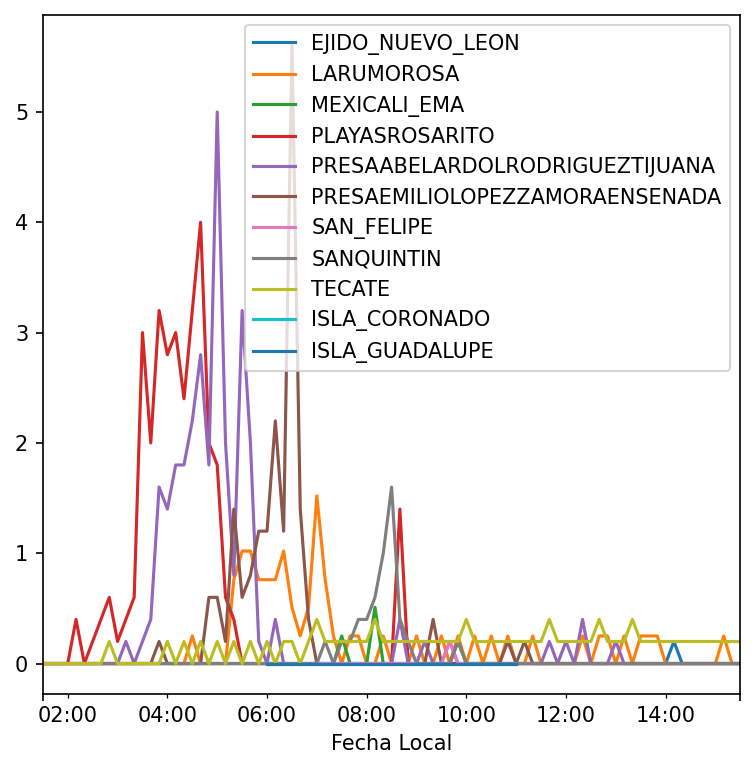

In [7]:
# Precipitación durante la tormenta.

# Incializamos gráfica.
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(6, 6)
fig.set_dpi(150) 

# Graficamos sin las estaciones insulares de SEMAR.
pluviograma.drop( ["ISLA_CORONADO", "ISLA_GUADALUPE"], axis = 1).plot(ax = ax)
# Graficmamos las estaciones de SEMAR con diferente dt.
pluviograma[["ISLA_CORONADO", "ISLA_GUADALUPE"]].iloc[27::3].plot(ax = ax)

In [8]:
# Calculamos la precipitación total para cada estación.

Estaciones["hp_TOT"] = pluviograma.sum().to_numpy()

Estaciones

ESTACION    LATITUD    LONGITUD           ESTADO  \
0                 EJIDO_NUEVO_LEON  32.414440 -115.192500  Baja California   
1                    ISLA_CORONADO  32.415600 -117.248100  Baja California   
2                   ISLA_GUADALUPE  28.882800 -118.293100  Baja California   
3                       LARUMOROSA  32.272222 -116.205556  Baja California   
4                     MEXICALI_EMA  32.666670 -115.457778  Baja California   
5                   PLAYASROSARITO  32.377500 -117.071389  Baja California   
6   PRESAABELARDOLRODRIGUEZTIJUANA  32.447222 -116.908333  Baja California   
7   PRESAEMILIOLOPEZZAMORAENSENADA  31.891389 -116.603333  Baja California   
8                       SAN_FELIPE  31.028050 -114.846660  Baja California   
9                       SANQUINTIN  30.531667 -115.837500  Baja California   
10                          TECATE  32.566670 -116.661389  Baja California   

             MUNICIPIO  ALTITUD  \
0             Mexicali     14.0   
1              Tijuana     76.0   
2             Ensenada     23.0   
3               Tecate   1262.0   
4             Mexicali     14.0   
5   Playas de Rosarito     36.9   
6              Tijuana    156.0   
7             Ensenada     32.0   
8             Mexicali     27.0   
9             Ensenada     32.0   
10              Tecate    583.7   

                                              ARCHIVO  \
0              Estacion_EJIDO_NUEVO_LEON__90_dias.csv   
1                 Estacion_ISLA_CORONADO__90_dias.csv   
2                Estacion_ISLA_GUADALUPE__90_dias.csv   
3                    Estacion_LARUMOROSA__90_dias.csv   
4                  Estacion_MEXICALI_EMA__90_dias.csv   
5                Estacion_PLAYASROSARITO__90_dias.csv   
6   Estacion_PRESAABELARDOLRODRIGUEZTIJUANA__90_di...   
7   Estacion_PRESAEMILIOLOPEZZAMORAENSENADA__90_di...   
8                    Estacion_SAN_FELIPE__90_dias.csv   
9                    Estacion_SANQUINTIN__90_dias.csv   
10                       Estacion_TECATE__90_dias.csv   

                           geometry             x             y  hp_TOT  
0   POINT (1252350.014 2318259.450)  1.252350e+06  2.318259e+06    0.20  
1   POINT (1058643.571 2337659.122)  1.058644e+06  2.337659e+06    7.30  
2    POINT (915764.064 1958404.802)  9.157641e+05  1.958405e+06    0.51  
3   POINT (1155275.080 2311612.307)  1.155275e+06  2.311612e+06   14.65  
4   POINT (1229974.568 2348638.310)  1.229975e+06  2.348638e+06    0.76  
5   POINT (1074839.464 2331663.295)  1.074839e+06  2.331663e+06   32.60  
6   POINT (1091009.953 2337794.109)  1.091010e+06  2.337794e+06   29.60  
7   POINT (1113431.313 2273135.331)  1.113431e+06  2.273135e+06   18.60  
8   POINT (1271148.725 2161421.674)  1.271149e+06  2.161422e+06    0.20  
9   POINT (1171337.908 2115317.077)  1.171338e+06  2.115317e+06    5.40  
10  POINT (1115628.012 2348658.379)  1.115628e+06  2.348658e+06   13.80

In [9]:
# Cargamos las Subcuencas.

# Region hidrológica a usar.
RH = "RH01"

# Cargamos archivo.
subc = gpd.read_file(path + "subcuenca.shp")
# A coordenadas Cónica Conforme de Lambert ITRF2008 ESPSG:6372.
subc = subc.to_crs(crs = CRS)
# Cramos una columna con la región hidrológica.
subc["CVE_RH"] = subc["CVE_SUBCUE"].apply(lambda x: x[0:4])

# Agramos área y perímetro.
subc["AREA"] = subc.area
subc["PERIMETRO"] = subc.length

# Graficamos la región hidrológica.
subc[subc["CVE_RH"] == RH].explore()

In [10]:
# Agregamos estaciones virtuales en los límites de la extensión de la cuenca.

# Alejamos los puntos de la cuenca para que los nuevos polígonos de Thiessen
# no toquen la cuenca.
buffer = 110000
# Obtenemos la extensión de la cuenta.
bounds = subc[subc["CVE_RH"] == RH].total_bounds
# Creamos los puntos en las esquinas e intermedio entre cada vértice
# agregando el valor del buffer.
bbox = [ [ bounds[0] - buffer, bounds[1] - buffer ],
         [ ( bounds[0] + bounds[2] ) / 2, bounds[1] - buffer ],
         [ bounds[2] + buffer, bounds[1] - buffer ],
         [ bounds[2] + buffer, ( bounds[1] + bounds[3] ) / 2 ],
         [ bounds[2] + buffer, bounds[3] + buffer ],
         [ ( bounds[0] + bounds[2] ) / 2, bounds[3] + buffer ],
         [ bounds[0] - buffer, bounds[3] + buffer ],
         [ bounds[0] - buffer, ( bounds[1] + bounds[3] ) / 2 ] ]
# Creamos una lista vacía con las geometrías de los puntos.
for i in range( len(bbox) ):
    bbox[i] = ( [f"B{i + 1}"] + [None] * ( Estaciones.shape[1] - 5 )
        + [shp.geometry.Point(bbox[i]), bbox[i][0], bbox[i][1] ] + [None] )
# Agregamos las estaciones virtuales.
Estaciones = pd.concat([Estaciones,
    pd.DataFrame(bbox, columns = Estaciones.columns)]
    ).reset_index( drop = True )

Estaciones

ESTACION    LATITUD    LONGITUD           ESTADO  \
0                 EJIDO_NUEVO_LEON   32.41444   -115.1925  Baja California   
1                    ISLA_CORONADO    32.4156   -117.2481  Baja California   
2                   ISLA_GUADALUPE    28.8828   -118.2931  Baja California   
3                       LARUMOROSA  32.272222 -116.205556  Baja California   
4                     MEXICALI_EMA   32.66667 -115.457778  Baja California   
5                   PLAYASROSARITO    32.3775 -117.071389  Baja California   
6   PRESAABELARDOLRODRIGUEZTIJUANA  32.447222 -116.908333  Baja California   
7   PRESAEMILIOLOPEZZAMORAENSENADA  31.891389 -116.603333  Baja California   
8                       SAN_FELIPE   31.02805  -114.84666  Baja California   
9                       SANQUINTIN  30.531667   -115.8375  Baja California   
10                          TECATE   32.56667 -116.661389  Baja California   
11                              B1       None        None             None   
12                              B2       None        None             None   
13                              B3       None        None             None   
14                              B4       None        None             None   
15                              B5       None        None             None   
16                              B6       None        None             None   
17                              B7       None        None             None   
18                              B8       None        None             None   

             MUNICIPIO ALTITUD  \
0             Mexicali    14.0   
1              Tijuana    76.0   
2             Ensenada    23.0   
3               Tecate  1262.0   
4             Mexicali    14.0   
5   Playas de Rosarito    36.9   
6              Tijuana   156.0   
7             Ensenada    32.0   
8             Mexicali    27.0   
9             Ensenada    32.0   
10              Tecate   583.7   
11                None    None   
12                None    None   
13                None    None   
14                None    None   
15                None    None   
16                None    None   
17                None    None   
18                None    None   

                                              ARCHIVO  \
0              Estacion_EJIDO_NUEVO_LEON__90_dias.csv   
1                 Estacion_ISLA_CORONADO__90_dias.csv   
2                Estacion_ISLA_GUADALUPE__90_dias.csv   
3                    Estacion_LARUMOROSA__90_dias.csv   
4                  Estacion_MEXICALI_EMA__90_dias.csv   
5                Estacion_PLAYASROSARITO__90_dias.csv   
6   Estacion_PRESAABELARDOLRODRIGUEZTIJUANA__90_di...   
7   Estacion_PRESAEMILIOLOPEZZAMORAENSENADA__90_di...   
8                    Estacion_SAN_FELIPE__90_dias.csv   
9                    Estacion_SANQUINTIN__90_dias.csv   
10                       Estacion_TECATE__90_dias.csv   
11                                               None   
12                                               None   
13                                               None   
14                                               None   
15                                               None   
16                                               None   
17                                               None   
18                                               None   

                           geometry             x             y hp_TOT  
0   POINT (1252350.014 2318259.450)  1.252350e+06  2.318259e+06    0.2  
1   POINT (1058643.571 2337659.122)  1.058644e+06  2.337659e+06    7.3  
2    POINT (915764.064 1958404.802)  9.157641e+05  1.958405e+06   0.51  
3   POINT (1155275.080 2311612.307)  1.155275e+06  2.311612e+06  14.65  
4   POINT (1229974.568 2348638.310)  1.229975e+06  2.348638e+06   0.76  
5   POINT (1074839.464 2331663.295)  1.074839e+06  2.331663e+06   32.6  
6   POINT (1091009.953 2337794.109)  1.091010e+06  2.337794e+06   29.6  
7   POINT (1113431.313 2273135.331)  1.113431e+06  2.273135

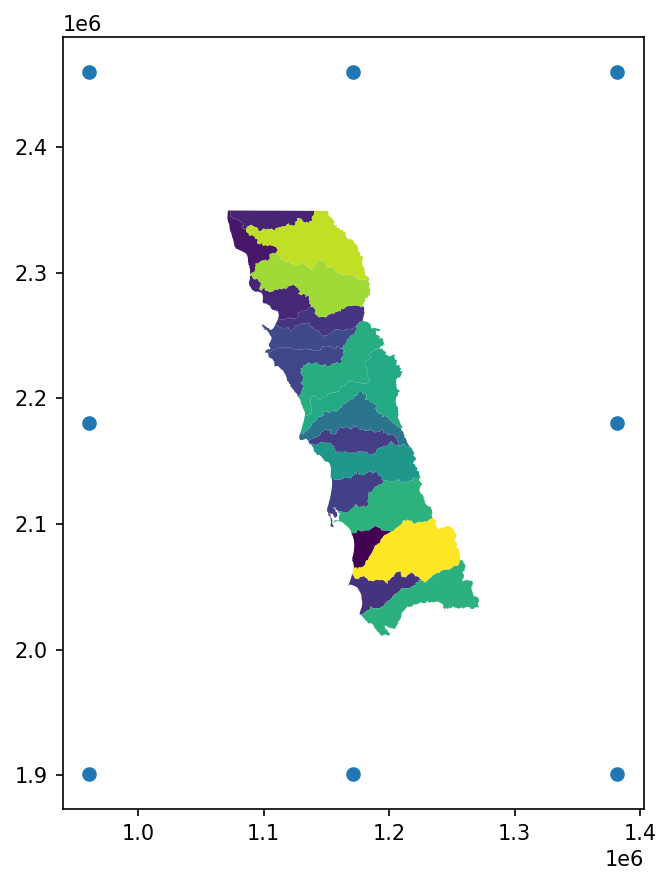

In [11]:
# Graficamos las estaciones virtuales en los límites de la cuenca.

# Incializamos gráfica.
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(6, 6)
fig.set_dpi(150) 

# Graficamos las subcuenca.
subc[subc["CVE_RH"] == "RH01"].plot("AREA", ax = ax)
# Graficamos los límites.
Estaciones.iloc[-8:].plot(ax = ax)

fig.tight_layout()
plt.show()

In [12]:
# Polígonos de Thiessen

# Creamos los polígonos de Thiessen.
Thiessen = spatial.Voronoi( Estaciones[ ["x", "y"] ] )

# Extraemos los polígonos de Thiessen, los convertimos en geometrías
# de Shapely y los agregamos al geoDataFrame de Estaciones.

# Lista de geometrías de Shapely.
Poly_th = []

# Iteramos para cada lista de vértices que forman un polígono.
for i in Thiessen.point_region:

    # Creamos la lista de vértices.
    Ver_th = []

    # Saltamos las listas vacías.
    if len(Thiessen.regions[i]) == 0: pass
    else:
        if -1 in Thiessen.regions[i]:
            Poly_th.append( shp.geometry.Polygon( ) )
    
        # Agregamos cada vértice que corresponde al polígono de Thiessen.
        else:
            for j in Thiessen.regions[i]:
                Ver_th.append( Thiessen.vertices[j] )

            # Agregamos nuevamente el primer vértice para cerrar el polígono.
            Ver_th.append( Ver_th[0] )

            # Convertimos a geometría de shapely.
            Poly_th.append( shp.geometry.Polygon( Ver_th ) )

# Creamos una columna del GeoDataframe con los polígonos de Thiessen.
Estaciones["Thiessen"] = Poly_th
# Establecemos como la geometría de trabajo.
Estaciones = Estaciones.set_geometry("Thiessen")

# Datos.
Estaciones

ESTACION    LATITUD    LONGITUD           ESTADO  \
0                 EJIDO_NUEVO_LEON   32.41444   -115.1925  Baja California   
1                    ISLA_CORONADO    32.4156   -117.2481  Baja California   
2                   ISLA_GUADALUPE    28.8828   -118.2931  Baja California   
3                       LARUMOROSA  32.272222 -116.205556  Baja California   
4                     MEXICALI_EMA   32.66667 -115.457778  Baja California   
5                   PLAYASROSARITO    32.3775 -117.071389  Baja California   
6   PRESAABELARDOLRODRIGUEZTIJUANA  32.447222 -116.908333  Baja California   
7   PRESAEMILIOLOPEZZAMORAENSENADA  31.891389 -116.603333  Baja California   
8                       SAN_FELIPE   31.02805  -114.84666  Baja California   
9                       SANQUINTIN  30.531667   -115.8375  Baja California   
10                          TECATE   32.56667 -116.661389  Baja California   
11                              B1       None        None             None   
12                              B2       None        None             None   
13                              B3       None        None             None   
14                              B4       None        None             None   
15                              B5       None        None             None   
16                              B6       None        None             None   
17                              B7       None        None             None   
18                              B8       None        None             None   

             MUNICIPIO ALTITUD  \
0             Mexicali    14.0   
1              Tijuana    76.0   
2             Ensenada    23.0   
3               Tecate  1262.0   
4             Mexicali    14.0   
5   Playas de Rosarito    36.9   
6              Tijuana   156.0   
7             Ensenada    32.0   
8             Mexicali    27.0   
9             Ensenada    32.0   
10              Tecate   583.7   
11                None    None   
12                None    None   
13                None    None   
14                None    None   
15                None    None   
16                None    None   
17                None    None   
18                None    None   

                                              ARCHIVO  \
0              Estacion_EJIDO_NUEVO_LEON__90_dias.csv   
1                 Estacion_ISLA_CORONADO__90_dias.csv   
2                Estacion_ISLA_GUADALUPE__90_dias.csv   
3                    Estacion_LARUMOROSA__90_dias.csv   
4                  Estacion_MEXICALI_EMA__90_dias.csv   
5                Estacion_PLAYASROSARITO__90_dias.csv   
6   Estacion_PRESAABELARDOLRODRIGUEZTIJUANA__90_di...   
7   Estacion_PRESAEMILIOLOPEZZAMORAENSENADA__90_di...   
8                    Estacion_SAN_FELIPE__90_dias.csv   
9                    Estacion_SANQUINTIN__90_dias.csv   
10                       Estacion_TECATE__90_dias.csv   
11                                               None   
12                                               None   
13                                               None   
14                                               None   
15                                               None   
16                                               None   
17                                               None   
18                                               None   

                           geometry             x             y hp_TOT  \
0   POINT (1252350.014 2318259.450)  1.252350e+06  2.318259e+06    0.2   
1   POINT (1058643.571 2337659.122)  1.058644e+06  2.337659e+06    7.3   
2    POINT (915764.064 1958404.802)  9.157641e+05  1.958405e+06   0.51   
3   POINT (1155275.080 2311612.307)  1.155275e+06  2.311612e+06  14.65   
4   POINT (1229974.568 2348638.310)  1.229975e+06  2.348638e+06   0.76   
5   POINT (1074839.464 2331663.295)  1.074839e+06  2.331663e+06   32.6   
6   POINT (1091009.953 2337794.109)  1.091010e+06  2.337794e+06   29.6   
7   POINT (1113431.313 2273135.331)  1.113431e+06  

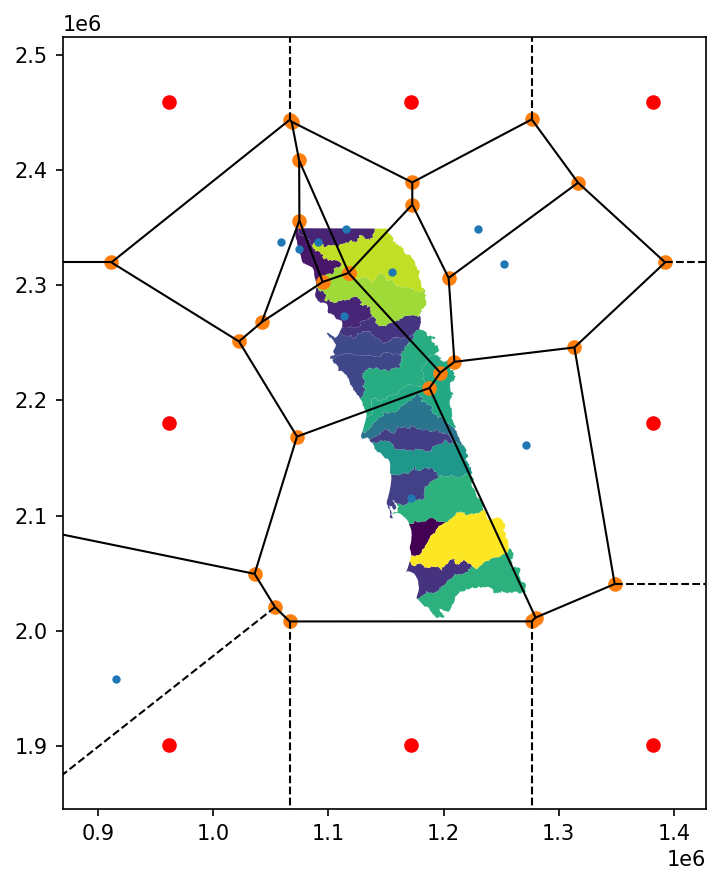

In [13]:
# Polígonos de Thiessen

# Incializamos gráfica.
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(6, 6)
fig.set_dpi(150) 

# Graficamos las subcuenca.
subc[subc["CVE_RH"] == "RH01"].plot("AREA", ax = ax, zorder = 2)
# Graficamos los polígonos de Thiessen.
spatial.voronoi_plot_2d(Thiessen, ax = ax, zorder = 1)
# Graficamos las estaciones virtuales en los límites de la cuenca.
Estaciones.loc[11:, "geometry"].plot(ax = ax, color = "r", zorder = 3)

fig.tight_layout()
plt.show()

In [14]:
# Retiramos las estaciones virtuales.

Estaciones = Estaciones.iloc[:-8].copy()
Estaciones["hp_TOT"] = Estaciones["hp_TOT"].astype(float)
Estaciones

ESTACION    LATITUD    LONGITUD           ESTADO  \
0                 EJIDO_NUEVO_LEON   32.41444   -115.1925  Baja California   
1                    ISLA_CORONADO    32.4156   -117.2481  Baja California   
2                   ISLA_GUADALUPE    28.8828   -118.2931  Baja California   
3                       LARUMOROSA  32.272222 -116.205556  Baja California   
4                     MEXICALI_EMA   32.66667 -115.457778  Baja California   
5                   PLAYASROSARITO    32.3775 -117.071389  Baja California   
6   PRESAABELARDOLRODRIGUEZTIJUANA  32.447222 -116.908333  Baja California   
7   PRESAEMILIOLOPEZZAMORAENSENADA  31.891389 -116.603333  Baja California   
8                       SAN_FELIPE   31.02805  -114.84666  Baja California   
9                       SANQUINTIN  30.531667   -115.8375  Baja California   
10                          TECATE   32.56667 -116.661389  Baja California   

             MUNICIPIO ALTITUD  \
0             Mexicali    14.0   
1              Tijuana    76.0   
2             Ensenada    23.0   
3               Tecate  1262.0   
4             Mexicali    14.0   
5   Playas de Rosarito    36.9   
6              Tijuana   156.0   
7             Ensenada    32.0   
8             Mexicali    27.0   
9             Ensenada    32.0   
10              Tecate   583.7   

                                              ARCHIVO  \
0              Estacion_EJIDO_NUEVO_LEON__90_dias.csv   
1                 Estacion_ISLA_CORONADO__90_dias.csv   
2                Estacion_ISLA_GUADALUPE__90_dias.csv   
3                    Estacion_LARUMOROSA__90_dias.csv   
4                  Estacion_MEXICALI_EMA__90_dias.csv   
5                Estacion_PLAYASROSARITO__90_dias.csv   
6   Estacion_PRESAABELARDOLRODRIGUEZTIJUANA__90_di...   
7   Estacion_PRESAEMILIOLOPEZZAMORAENSENADA__90_di...   
8                    Estacion_SAN_FELIPE__90_dias.csv   
9                    Estacion_SANQUINTIN__90_dias.csv   
10                       Estacion_TECATE__90_dias.csv   

                           geometry             x             y  hp_TOT  \
0   POINT (1252350.014 2318259.450)  1.252350e+06  2.318259e+06    0.20   
1   POINT (1058643.571 2337659.122)  1.058644e+06  2.337659e+06    7.30   
2    POINT (915764.064 1958404.802)  9.157641e+05  1.958405e+06    0.51   
3   POINT (1155275.080 2311612.307)  1.155275e+06  2.311612e+06   14.65   
4   POINT (1229974.568 2348638.310)  1.229975e+06  2.348638e+06    0.76   
5   POINT (1074839.464 2331663.295)  1.074839e+06  2.331663e+06   32.60   
6   POINT (1091009.953 2337794.109)  1.091010e+06  2.337794e+06   29.60   
7   POINT (1113431.313 2273135.331)  1.113431e+06  2.273135e+06   18.60   
8   POINT (1271148.725 2161421.674)  1.271149e+06  2.161422e+06    0.20   
9   POINT (1171337.908 2115317.077)  1.171338e+06  2.115317e+06    5.40   
10  POINT (1115628.012 2348658.379)  1.115628e+06  2.348658e+06   13.80   

                                             Thiessen  
0   POLYGON ((1316789.800 2389152.066, 1392434.676...  
1   POLYGON ((1074749.334 2356291.876, 1074531.774...  
2                            GEOMETRYCOLLECTION EMPTY  
3   POLYGON ((1117550.695 2310977.677, 1172805.057...  
4   POLYGON ((1316789.800 2389152.066, 1204399.021...  
5   POLYGON ((1094972.637 2302951.373, 1042094.526...  
6   POLYGON ((1094972.637 2302951.373, 1117457.215...  
7   POLYGON ((1094972.637 2302951.373, 1117457.215...  
8   POLYGON ((1209384.430 2233564.055, 1197126.945...  
9   POLYGON ((1187752.631 2210872.616, 1279890.670...  
10  POLYGON ((1117550.695 2310977.677, 1172805.057...

In [15]:
# Isoyetas

# Calculamos las isoyetas y las guardamos en una variable.
isoyetas = plt.tricontour( Estaciones["x"],
    Estaciones["y"], Estaciones["hp_TOT"], levels = 15 )

# Extraemos las isoyetas y las convertimos en curvas de Shapely.

# Lista con el nivel de las isoyetas repetido
# por cada isoyeta que haya en ese nivel.
hp_level = []
# Cantidad de isoyetas que tiene un nivel.
level_n  = []
# Curvas de cada isoyeta.
level_c  = []

# Iteramos para todos los grupos de isoyetas allsegs.
# Evitamos el primer y último grupo que están vacíos.
for i in range( len(isoyetas.allsegs[1:-1]) ):
    # Contamos la cantidad de isoyetas que hay en un grupo, lo agregamos
    # a la lista level_n e imprimimos los valores.
    level_n.append( len( isoyetas.allsegs[1 + i] ) )
    print(f"nivel {i}: {level_n[i]}")

    # Copiamos el nivel de la isoyeta tantas
    # veces como isoyetas haya en ese nivel.
    hp_level = hp_level + [isoyetas.levels[i]] * level_n[i]

    # Entramos en cada grupo i, que tiene una cantidad level_n[i]
    # de elementos dentro, convertimos cada elemento en una
    # geometría de shapely y lo metemos dentro de una lista
    # de una sola dimensión (como hacer flatten).
    for j in range( 0, level_n[i] ):
        level_c.append( shp.geometry.LineString(isoyetas.allsegs[i + 1][j]) )

# Creamos un DataFrame con los niveles de isoyetas.
df_is = pd.DataFrame(hp_level, columns = ["hp [mm]"])
# Agregamos las geometrías de shapely.
df_is["geometry"] = level_c
# Convertimos en un GeoDataFrame.
df_is = gpd.GeoDataFrame(df_is)
# Establecemos que hemos estado trabajando con coordenadas UTM 11N (m).
df_is = df_is.set_crs(CRS)

# Evitamos graficar.
plt.close()

df_is

nivel 0: 1
nivel 1: 1
nivel 2: 1
nivel 3: 1
nivel 4: 1
nivel 5: 1
nivel 6: 1
nivel 7: 1
nivel 8: 1
nivel 9: 1
nivel 10: 1
nivel 11: 1
nivel 12: 1


hp [mm]                                           geometry
0       0.0  LINESTRING (957638.912 2069555.921, 937508.554...
1       2.5  LINESTRING (1010245.505 2209193.005, 964825.75...
2       5.0  LINESTRING (1060396.938 2337997.561, 1058933.8...
3       7.5  LINESTRING (1082314.031 2342228.044, 1062562.3...
4      10.0  LINESTRING (1104231.124 2346458.528, 1066190.8...
5      12.5  LINESTRING (1129224.021 2230093.989, 1144289.0...
6      15.0  LINESTRING (1118256.863 2259983.810, 1122860.0...
7      17.5  LINESTRING (1077076.443 2337735.998, 1066773.5...
8      20.0  LINESTRING (1080704.961 2337751.131, 1068373.9...
9      22.5  LINESTRING (1084333.479 2337766.264, 1069974.2...
10     25.0  LINESTRING (1087961.998 2337781.397, 1071574.6...
11     27.5  LINESTRING (1082006.522 2320793.816, 1088853.8...
12     30.0  LINESTRING (1075115.120 2331245.238, 1075378.4...

In [16]:
# Graficamos las isoyetas.
df_is.explore()

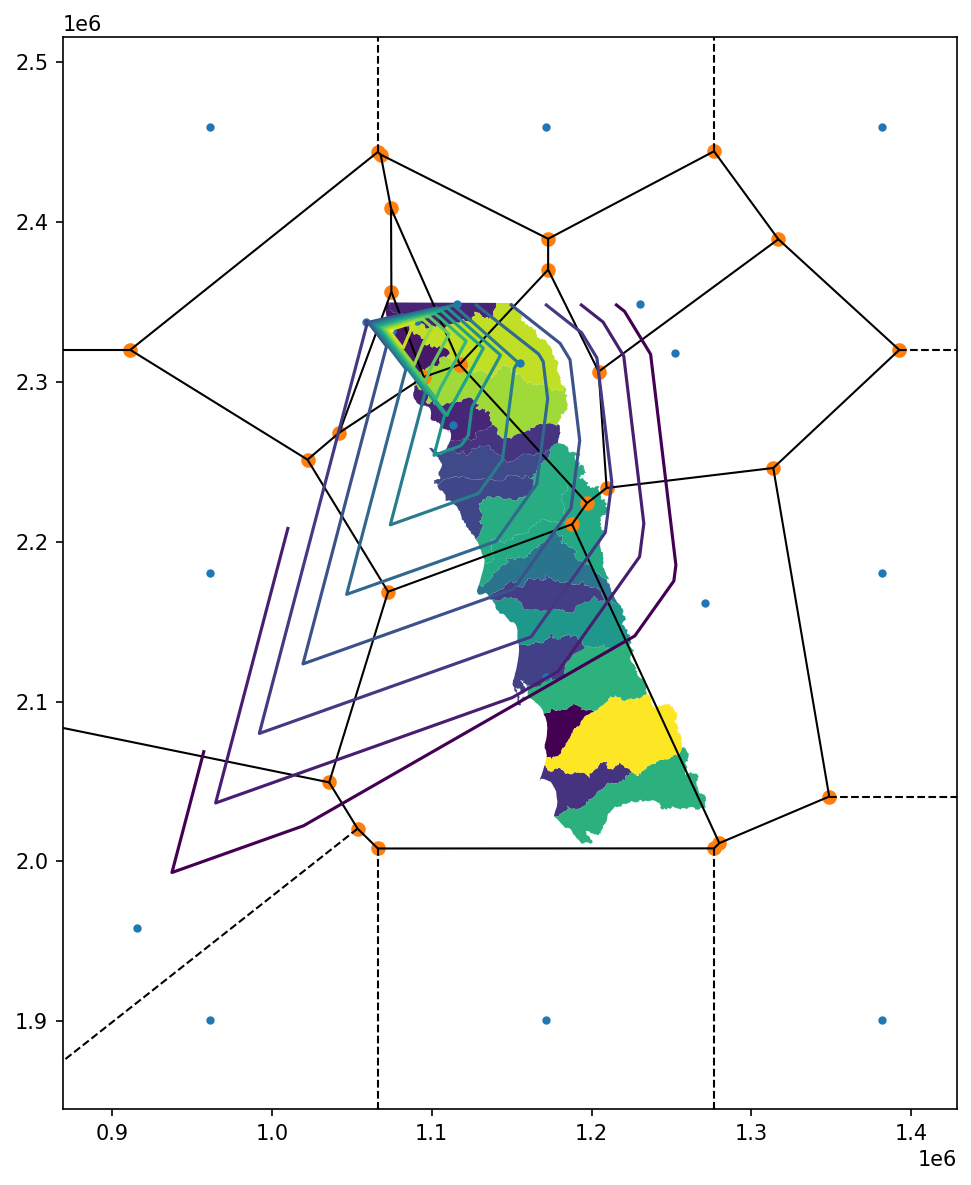

In [17]:
# Polígonos de Thiessen + isoyetas.

# Incializamos gráfica.
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(8, 8)
fig.set_dpi(150) 

# Graficamos las subcuenca.
subc[subc["CVE_RH"] == "RH01"].plot("AREA", ax = ax)
# Graficamos los polígonos de Thiessen.
spatial.voronoi_plot_2d(Thiessen, ax = ax)
# Graficamos las isoyetas.
df_is.plot("hp [mm]", ax = ax)

fig.tight_layout()
plt.show()

In [18]:
# Extraemos la subcuenca con la que trabajaremos.
Subcuenca = subc[ subc["CVE_SUBCUE"] == "RH01Bd" ].reset_index(drop = True)

Subcuenca

CVE_SUBCUE     SUBCUENCA       TIPO          AREA      PERIMETRO  \
0     RH01Bd  A. El Salado  EXORREICA  1.868140e+09  407083.340466   

                                            geometry CVE_RH  
0  POLYGON ((1207948.053 2206741.772, 1207936.647...   RH01

In [19]:
# Graficamos la subcuenca.
Subcuenca.explore()

In [20]:
# Áreas de influencia

# Escogemos la parte de cada polígono de Thiessen que cae dentro de la cuenca.
Estaciones[Subcuenca.loc[0, "CVE_SUBCUE"]] = ( Estaciones[ "Thiessen"
    ].intersection( Subcuenca.loc[0, "geometry"] ) )
Estaciones = Estaciones.set_geometry(Subcuenca.loc[0, "CVE_SUBCUE"]).copy()

# Eliminamos las estaciones que no son relevantes para la cuenca.
subc_th = Estaciones[ ~ Estaciones.is_empty ].reset_index(drop = True)
# Área de las áreas de influencia.
subc_th[f"{Subcuenca.loc[0, 'CVE_SUBCUE']}_AREA"] = subc_th.area

subc_th

ESTACION    LATITUD    LONGITUD           ESTADO  \
0                      LARUMOROSA  32.272222 -116.205556  Baja California   
1  PRESAEMILIOLOPEZZAMORAENSENADA  31.891389 -116.603333  Baja California   
2                      SAN_FELIPE   31.02805  -114.84666  Baja California   
3                      SANQUINTIN  30.531667   -115.8375  Baja California   

  MUNICIPIO ALTITUD                                            ARCHIVO  \
0    Tecate  1262.0                   Estacion_LARUMOROSA__90_dias.csv   
1  Ensenada    32.0  Estacion_PRESAEMILIOLOPEZZAMORAENSENADA__90_di...   
2  Mexicali    27.0                   Estacion_SAN_FELIPE__90_dias.csv   
3  Ensenada    32.0                   Estacion_SANQUINTIN__90_dias.csv   

                          geometry             x             y  hp_TOT  \
0  POINT (1155275.080 2311612.307)  1.155275e+06  2.311612e+06   14.65   
1  POINT (1113431.313 2273135.331)  1.113431e+06  2.273135e+06   18.60   
2  POINT (1271148.725 2161421.674)  1.271149e+06  2.161422e+06    0.20   
3  POINT (1171337.908 2115317.077)  1.171338e+06  2.115317e+06    5.40   

                                            Thiessen  \
0  POLYGON ((1117550.695 2310977.677, 1172805.057...   
1  POLYGON ((1094972.637 2302951.373, 1117457.215...   
2  POLYGON ((1209384.430 2233564.055, 1197126.945...   
3  POLYGON ((1187752.631 2210872.616, 1279890.670...   

                                              RH01Bd   RH01Bd_AREA  
0  POLYGON ((1197126.945 2224107.277, 1185820.218...  1.513188e+08  
1  POLYGON ((1197126.945 2224107.277, 1187752.631...  5.178663e+08  
2  POLYGON ((1187752.631 2210872.616, 1197126.945...  6.165250e+08  
3  POLYGON ((1200483.074 2183312.762, 1200457.408...  5.824298e+08

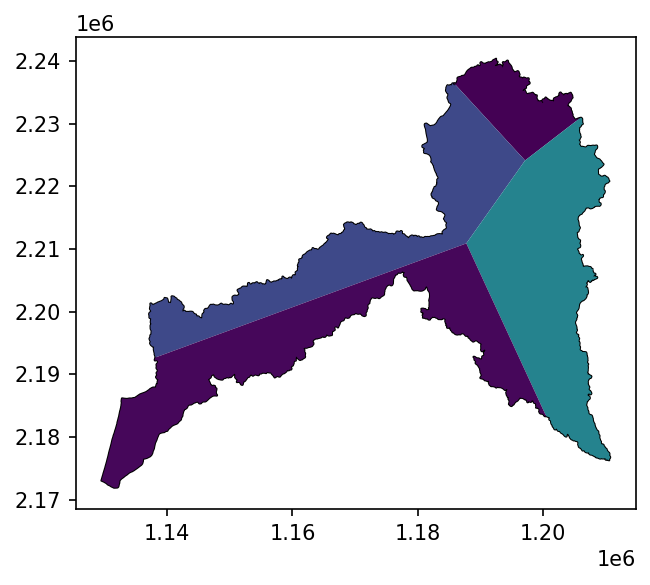

In [21]:
# Áreas de influencia

# Incializamos gráfica.
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(6, 4)
fig.set_dpi(150) 

# Graficamos la cuenca.
Subcuenca.plot(ax = ax, color = "None", edgecolor = "k")
# Graficamos las áreas de influencia.
Estaciones.plot("hp_TOT", ax = ax)

fig.tight_layout()
plt.show()

In [22]:
# Obtenemos la parte de la línea de cada isoyeta que cae dentro de la cuenca.
df_is[Subcuenca.loc[0, "CVE_SUBCUE"]] = df_is["geometry"
    ].intersection( Subcuenca.loc[0, "geometry"] )
#subc_is[f"{Subcuenca.loc[0, 'CVE_SUBCUE']}_POLY"] = ( subc_is.set_geometry(
#    "IS_TOT").intersection( Subcuenca.loc[0, "geometry"] ) )
subc_is = df_is.set_geometry(Subcuenca.loc[0, "CVE_SUBCUE"]).copy()

# Eliminamos las isoyetas que no cruzan la subcuenca.
subc_is = subc_is[ ~ subc_is.is_empty ].reset_index(drop = True)

subc_is

hp [mm]                                           geometry  \
0      5.0  LINESTRING (1060396.938 2337997.561, 1058933.8...   
1      7.5  LINESTRING (1082314.031 2342228.044, 1062562.3...   
2     10.0  LINESTRING (1104231.124 2346458.528, 1066190.8...   

                                              RH01Bd  
0  MULTILINESTRING ((1194513.731 2185968.549, 120...  
1  MULTILINESTRING ((1173794.108 2202144.548, 117...  
2  LINESTRING (1137180.414 2199134.220, 1140191.1...

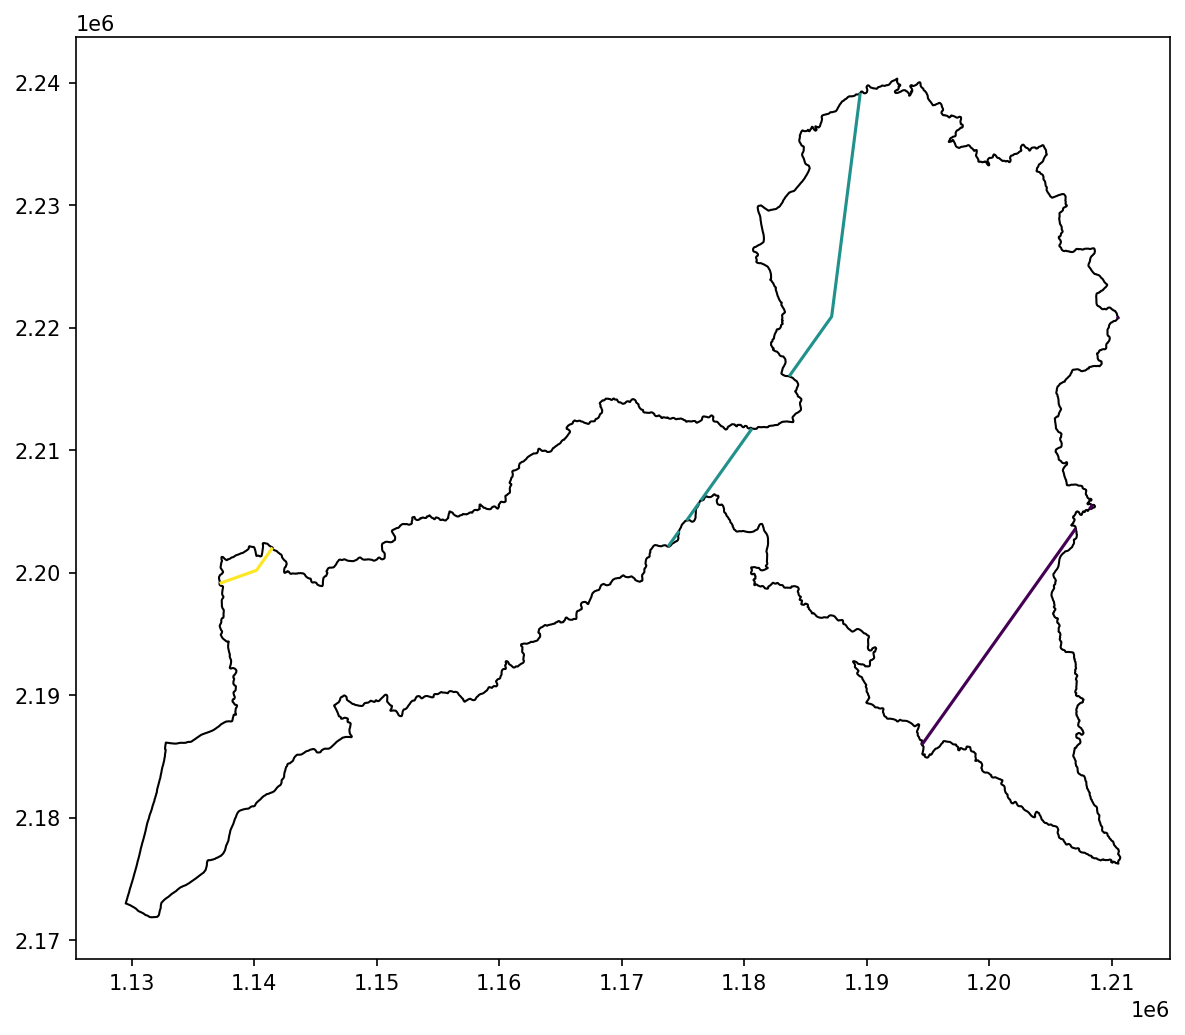

In [23]:
# Isoyetas que cruzan la cuenca.

# Incializamos gráfica.
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(8, 8)
fig.set_dpi(150) 

# Graficamos la subcuenca.
Subcuenca.plot(ax = ax, color = "None", edgecolor = "k")
# Graficamos las isoyetas.
subc_is.plot("hp [mm]", ax = ax)

fig.tight_layout()
plt.show()

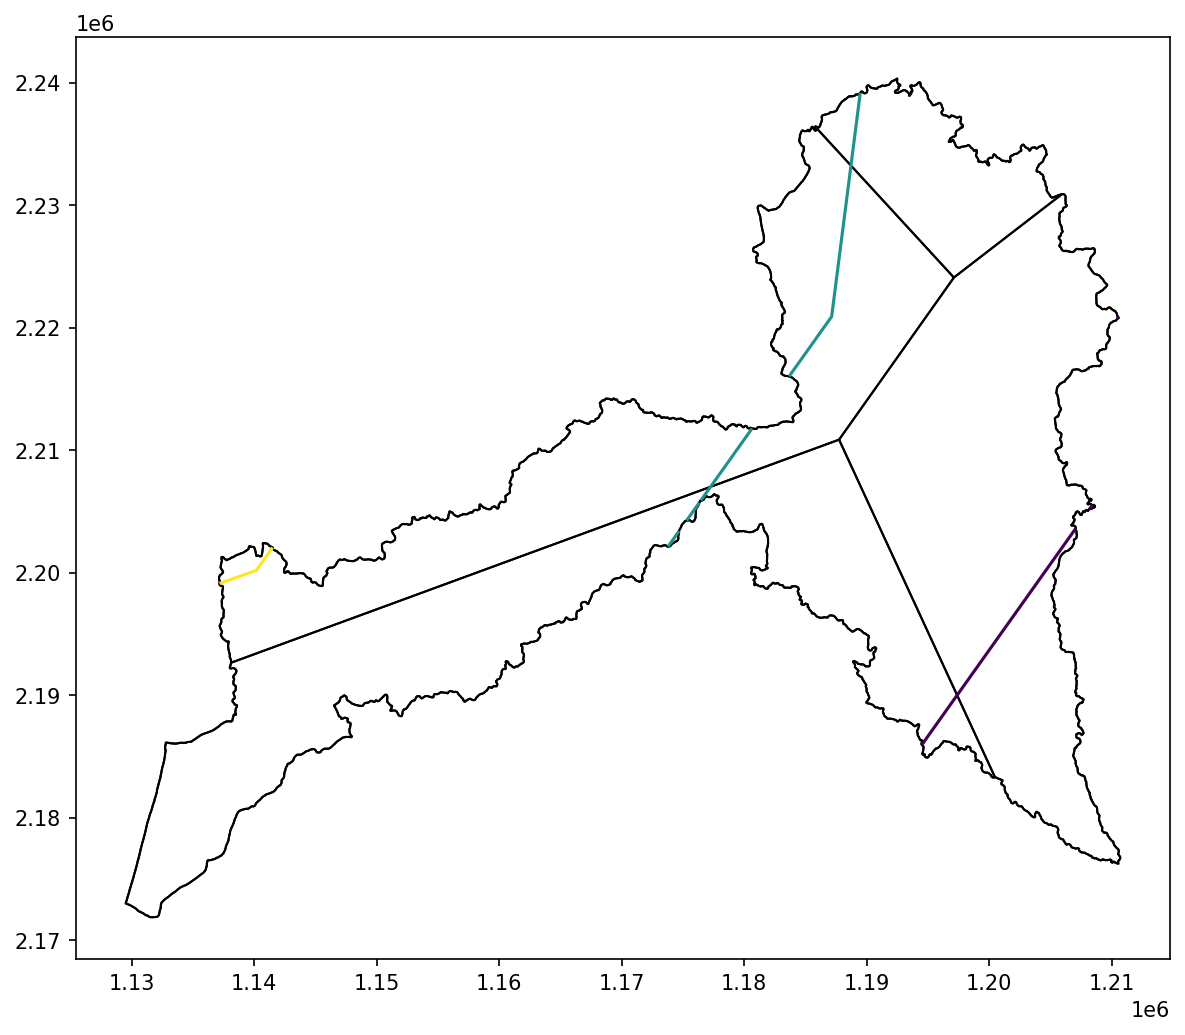

In [24]:
# Polígonos de Thiessen e isoyetas que cruzan la cuenca.

# Incializamos gráfica.
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(8, 8)
fig.set_dpi(150) 

# Graficamos la subcuenca.
Subcuenca.plot(ax = ax, color = "None", edgecolor = "k")
# Graficamos los polígonos de Thiessen.
subc_th.plot(ax = ax, color = "None", edgecolor = "k")
# Graficamos las isoyetas.
subc_is.plot("hp [mm]", ax = ax)

fig.tight_layout()
plt.show()

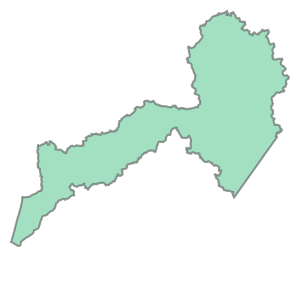

In [25]:
# Verificamos la geometría que hay que utilizar dentro del split
# para el área incremental isoyetas.
i = 0
j = 0

shp.ops.split(Subcuenca.loc[0, "geometry"], subc_is.loc[i, "geometry"])[j]

In [26]:
# Área incremental de isoyetas.

# Geometrías a utilizar dentro del split para el área incremental de isoyetas.
j = [ [0], [1, 4], [1] ]
m = []

# Iteramos para todas las isoyetas.
for i in range(subc_is.shape[0]):

    g = []
    # Curva de la isoyeta.
    l = subc_is.loc[i, "geometry"]

    # Unimos todas las geometrías del área incremental isoyetas.
    for k in j[i]:
        g.append( shp.ops.split( Subcuenca.loc[0, "geometry"], l)[k] )

    # Agregamos la geometría.
    m.append( shp.geometry.MultiPolygon(g) )

# Agregamoslas geometrías creadas.
subc_is[f"{Subcuenca.loc[0, 'CVE_SUBCUE']}_POLY"] = m

subc_is

hp [mm]                                           geometry  \
0      5.0  LINESTRING (1060396.938 2337997.561, 1058933.8...   
1      7.5  LINESTRING (1082314.031 2342228.044, 1062562.3...   
2     10.0  LINESTRING (1104231.124 2346458.528, 1066190.8...   

                                              RH01Bd  \
0  MULTILINESTRING ((1194513.731 2185968.549, 120...   
1  MULTILINESTRING ((1173794.108 2202144.548, 117...   
2  LINESTRING (1137180.414 2199134.220, 1140191.1...   

                                         RH01Bd_POLY  
0  (POLYGON ((1207948.053464299 2206741.772203978...  
1  (POLYGON ((1176474.339856406 2205913.464116898...  
2  (POLYGON ((1137180.413719016 2199134.219720469...

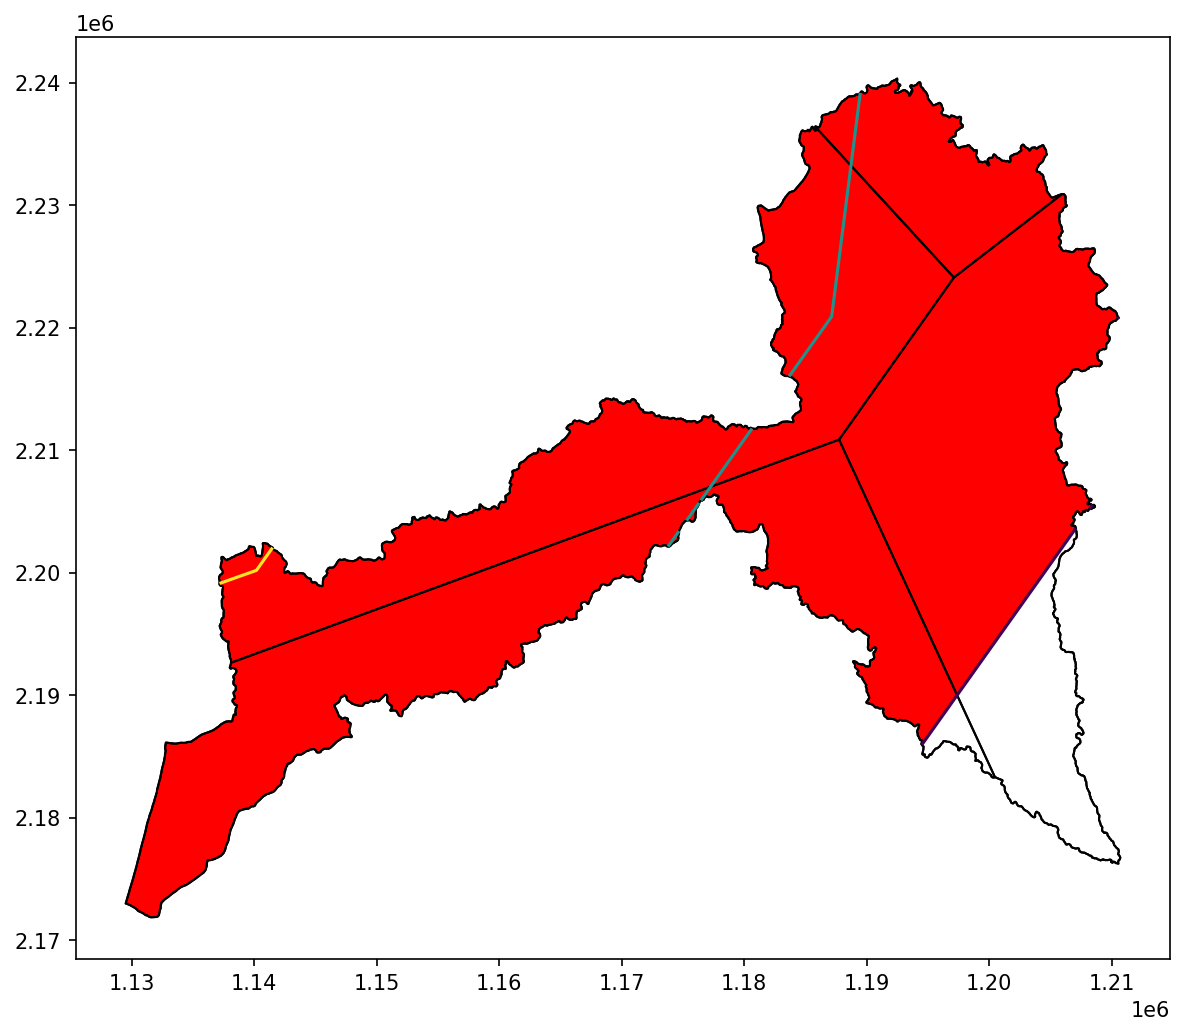

In [27]:
# Polígonos de Thiessen + áreas incremental de isoyetas (Ci para h - a - d)

# Incializamos gráfica.
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(8, 8)
fig.set_dpi(150) 

i = 0

# Graficamos la subcuenca.
Subcuenca.plot(ax = ax, color = "None", edgecolor = "k")
# Graficamos los polígonos de Thiessen.
Estaciones.plot(ax = ax, color = "None", edgecolor = "k")
# Graficamos las isoyetas.
subc_is.set_geometry(Subcuenca.loc[0, "CVE_SUBCUE"]).plot("hp [mm]", ax = ax)
# Áreas isoyetas incrementales.
subc_is.set_geometry(f"{Subcuenca.loc[0, 'CVE_SUBCUE']}_POLY"
    ).loc[ [i] ].plot( ax = ax, color = "r", zorder = 0)

fig.tight_layout()
plt.show()

In [28]:
# Áreas de influencia para cada Ci, área incremental de isoyetas.

# Iteramos de atrás hacia adelante para cada isoyeta (mayor a menor).
for i in reversed( range(subc_is.shape[0]) ):
    # La geometría es la intersección del área incremental de isoyeta Ci y los
    # polígonos de Thiessen dentro de la cuenca.
    subc_th[f"IS_{subc_is.index[i]}"] = subc_th[
        f"{Subcuenca.loc[0, 'CVE_SUBCUE']}" ].intersection(
        subc_is.loc[ i, f"{Subcuenca.loc[0, 'CVE_SUBCUE']}_POLY" ] )
    # Calculamos el área.
    subc_th[f"IS_{subc_is.index[i]}_AREA"] = subc_th[
        f"IS_{subc_is.index[i]}"].area

subc_th

ESTACION    LATITUD    LONGITUD           ESTADO  \
0                      LARUMOROSA  32.272222 -116.205556  Baja California   
1  PRESAEMILIOLOPEZZAMORAENSENADA  31.891389 -116.603333  Baja California   
2                      SAN_FELIPE   31.02805  -114.84666  Baja California   
3                      SANQUINTIN  30.531667   -115.8375  Baja California   

  MUNICIPIO ALTITUD                                            ARCHIVO  \
0    Tecate  1262.0                   Estacion_LARUMOROSA__90_dias.csv   
1  Ensenada    32.0  Estacion_PRESAEMILIOLOPEZZAMORAENSENADA__90_di...   
2  Mexicali    27.0                   Estacion_SAN_FELIPE__90_dias.csv   
3  Ensenada    32.0                   Estacion_SANQUINTIN__90_dias.csv   

                          geometry             x             y  hp_TOT  \
0  POINT (1155275.080 2311612.307)  1.155275e+06  2.311612e+06   14.65   
1  POINT (1113431.313 2273135.331)  1.113431e+06  2.273135e+06   18.60   
2  POINT (1271148.725 2161421.674)  1.271149e+06  2.161422e+06    0.20   
3  POINT (1171337.908 2115317.077)  1.171338e+06  2.115317e+06    5.40   

                                            Thiessen  \
0  POLYGON ((1117550.695 2310977.677, 1172805.057...   
1  POLYGON ((1094972.637 2302951.373, 1117457.215...   
2  POLYGON ((1209384.430 2233564.055, 1197126.945...   
3  POLYGON ((1187752.631 2210872.616, 1279890.670...   

                                              RH01Bd   RH01Bd_AREA  \
0  POLYGON ((1197126.945 2224107.277, 1185820.218...  1.513188e+08   
1  POLYGON ((1197126.945 2224107.277, 1187752.631...  5.178663e+08   
2  POLYGON ((1187752.631 2210872.616, 1197126.945...  6.165250e+08   
3  POLYGON ((1200483.074 2183312.762, 1200457.408...  5.824298e+08   

                                                IS_2     IS_2_AREA  \
0                                      POLYGON EMPTY  0.000000e+00   
1  POLYGON ((1137180.740 2199239.819, 1137188.820...  6.479239e+06   
2                                      POLYGON EMPTY  0.000000e+00   
3                                      POLYGON EMPTY  0.000000e+00   

                                                IS_1     IS_1_AREA  \
0  POLYGON ((1185820.218 2236403.360, 1185817.327...  1.055000e+07   
1  MULTIPOLYGON (((1138116.360 2192660.100, 11381...  3.620355e+08   
2                                      POLYGON EMPTY  0.000000e+00   
3  POLYGON ((1176447.292 2205916.089, 1176413.581...  3.771467e+08   

                                                IS_0     IS_0_AREA  
0  POLYGON ((1185820.218 2236403.360, 1185817.327...  1.513188e+08  
1  POLYGON ((1187752.631 2210872.616, 1138116.360...  5.178663e+08  
2  POLYGON ((1197126.945 2224107.277, 1205947.626...  4.738854e+08  
3  POLYGON ((1194507.689 2185975.165, 1194491.550...  5.699543e+08

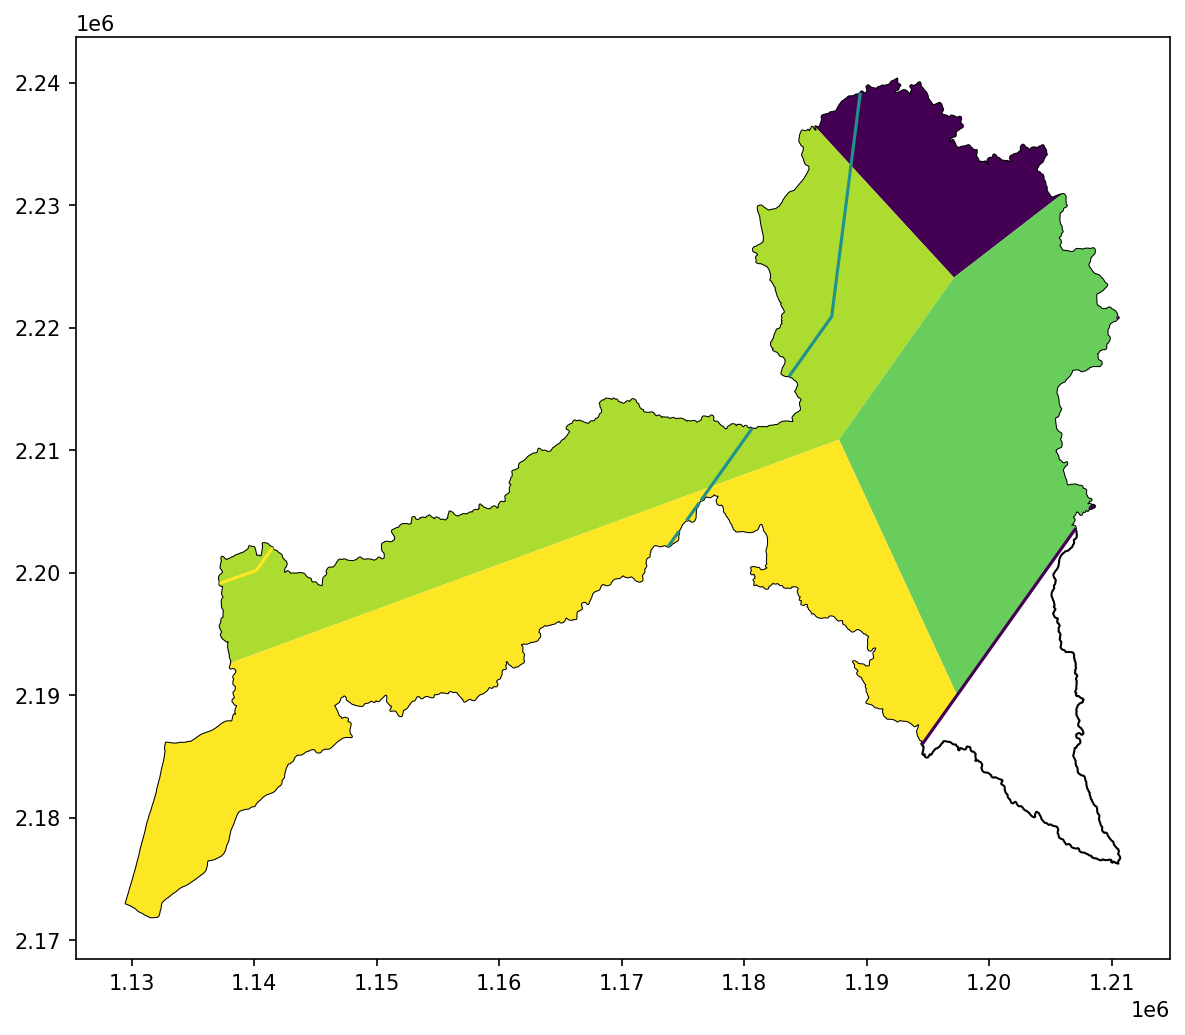

In [29]:
# Áreas de influencia + áreas isoyetas incrementales (Ci para h - a - d)

# Incializamos gráfica.
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(8, 8)
fig.set_dpi(150) 

i = 0

# Graficamos la subcuenca.
Subcuenca.plot(ax = ax, color = "None", edgecolor = "k")
# Graficamos los polígonos de Thiessen para las áreas isoyetas incrementales.
subc_th.set_geometry(f"IS_{i}").plot(f"IS_{i}_AREA", ax = ax)
# Graficamos las isoyetas.
subc_is.set_geometry(Subcuenca.loc[0, "CVE_SUBCUE"]).plot("hp [mm]", ax = ax)

fig.tight_layout()
plt.show()

In [30]:
# Precipitación media por Thiessen.

# Creamos una lista con nombres de las isoyetas y sus áreas.
areas_n = ( [ Subcuenca.loc[0, "CVE_SUBCUE"] ]
    + [ f"IS_{x}"for x in range(subc_is.shape[0]) ] )
areas_na = [f"{x}_AREA" for x in areas_n]

# Precipitación media por Thiessen.
hp_th = []
for i in range( len(areas_na) ):
    hp_th.append( ( subc_th["hp_TOT"] * subc_th[areas_na[i]] ).sum()
        / subc_th[areas_na[i]].sum() )

# Creamos un DataFrame con la precipitación media.
areas_is = pd.DataFrame( hp_th, columns = ["hp_th"],
    index = areas_n ).reset_index()
areas_is = areas_is.rename( {"index": "AREA"}, axis = 1)

areas_is

AREA      hp_th
0  RH01Bd   8.092306
1    IS_0   8.769087
2    IS_1  11.904265
3    IS_2  18.600000

In [31]:
# Precipitación media por isoyetas.

# Áreas entre isoyetas.
# Diferencia entre el área de dos isoyetas contiguas.
# Los casos borde son ligeramente diferente (ejemplo: toda la subcuenca menos
# primer isoyeta).
m = []
for i in areas_is.index:
    if i == areas_is.index[-1]:
        p = subc_is.loc[i - 1, f"{areas_n[0]}_POLY"]
    elif i > 0:
        p = subc_is.loc[i - 1, f"{areas_n[0]}_POLY"
            ].difference( subc_is.loc[ i, f"{areas_n[0]}_POLY"] )
    else:
        p = Subcuenca.loc[0, "geometry"].difference(
            subc_is.loc[i, f"{areas_n[0]}_POLY"] )
    
    if type(p) == shp.geometry.polygon.Polygon: p = [p]
    m = ( [ shp.geometry.MultiPolygon( p ) ] + m )

# Agregamos las áreas entre isoyetas al DataFrame.
areas_is["IS_GEOM"] = m
areas_is = gpd.GeoDataFrame( areas_is, geometry = "IS_GEOM" )
areas_is["IS_AREA"] = areas_is.area

# Calculamos el paso entre cada isoyeta.
step = subc_is.at[ 1, "hp [mm]" ] - subc_is.at[ 0, "hp [mm]" ]
mid = step / 2

# Calculamos la precipitación entre isoyetas.
m = ( [subc_is.at[ 0, "hp [mm]" ] - mid ]
    + list(subc_is[ "hp [mm]" ] + mid) )

# Agregamos la precipitación entre isoyetas al DataFrame.
areas_is["hp_area"] = m

# Precipitación media por isoyetas.
m = []
for i in range(areas_is.shape[0]):
    m.append( ( areas_is.loc[i:, "hp_area"]
        * areas_is.loc[i:, "IS_AREA"] ).sum()
        / areas_is.loc[i:, "IS_AREA"].sum() )

# Factor de ajuste.
areas_is["hp_is"] = m
areas_is["Fa"] = areas_is["hp_is"] / areas_is["hp_th"]

areas_is

AREA      hp_th                                            IS_GEOM  \
0  RH01Bd   8.092306  MULTIPOLYGON (((1137180.414 2199134.220, 11371...   
1    IS_0   8.769087  MULTIPOLYGON (((1176447.292 2205916.089, 11764...   
2    IS_1  11.904265  MULTIPOLYGON (((1207936.647 2206699.412, 12079...   
3    IS_2  18.600000  MULTIPOLYGON (((1208462.752 2205534.816, 12085...   

        IS_AREA  hp_area      hp_is        Fa  
0  6.479239e+06     3.75   7.945595  0.981870  
1  7.432529e+08     6.25   7.960197  0.907757  
2  9.632926e+08     8.75   9.096732  0.764157  
3  1.551151e+08    11.25  11.250000  0.604839

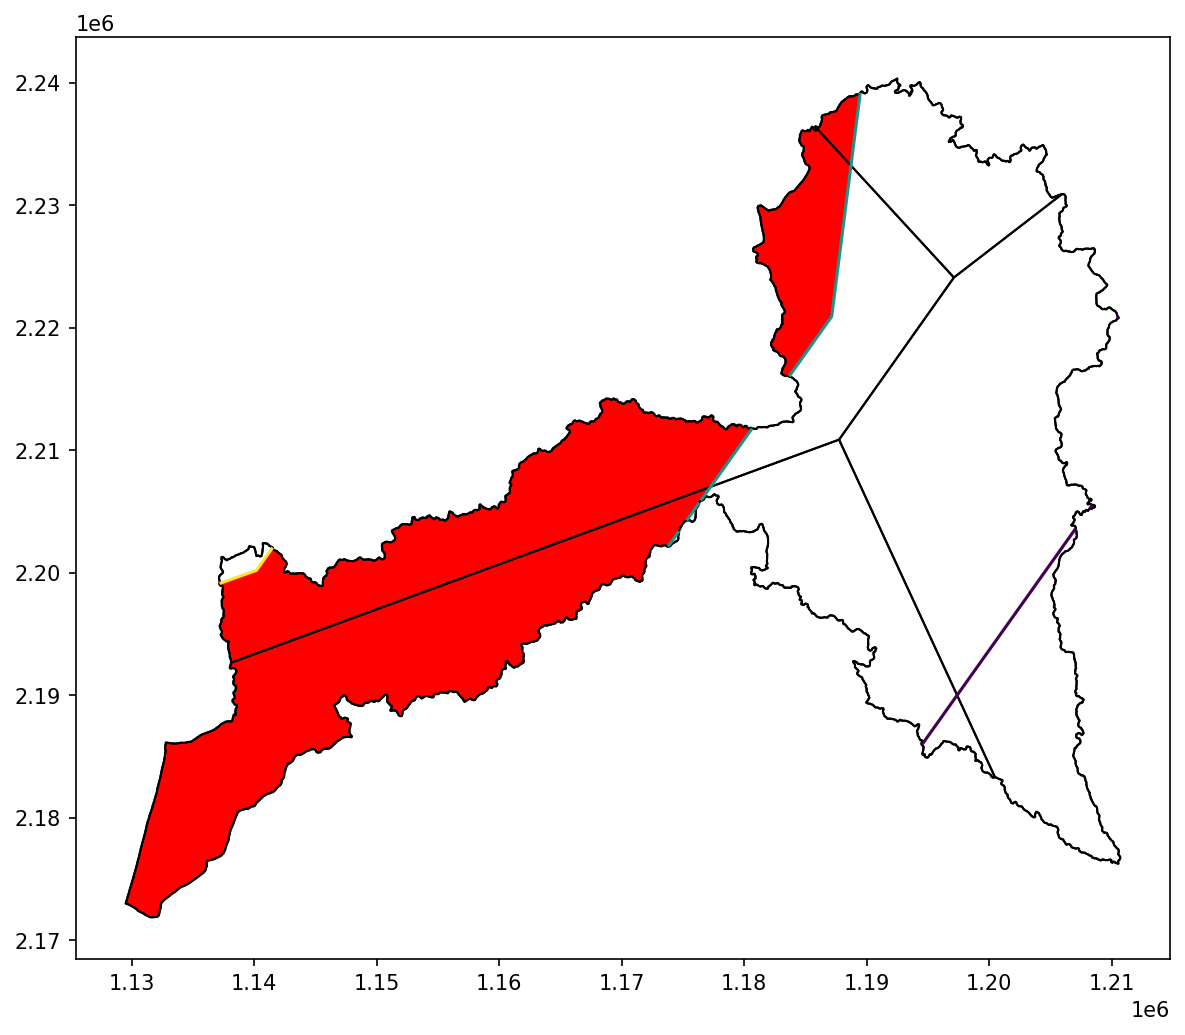

In [32]:
# Polígonos de Thiessen + areas entre isoyetas.

# Incializamos gráfica.
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(8, 8)
fig.set_dpi(150) 

i = 1

# Graficamos la subcuenca.
Subcuenca.plot(ax = ax, color = "None", edgecolor = "k")
# Graficamos los polígonos de Thiessen.
Estaciones.plot(ax = ax, color = "None", edgecolor = "k")
# Graficamos las áreas entre isoyetas.
subc_is.set_geometry(Subcuenca.loc[0, "CVE_SUBCUE"]).plot("hp [mm]", ax = ax)
areas_is.loc[ [i] ].plot(ax = ax, color = "r", zorder = 0)

fig.tight_layout()
plt.show()

In [33]:
# Calculamos la curva masa para las estaciones de interés.
curva_masa = pluviograma[subc_th["ESTACION"]].cumsum()

curva_masa

LARUMOROSA  PRESAEMILIOLOPEZZAMORAENSENADA  SAN_FELIPE  \
Fecha Local                                                                   
2023-01-01 01:30:00        0.00                             0.0         0.0   
2023-01-01 01:40:00        0.00                             0.0         0.0   
2023-01-01 01:50:00        0.00                             0.0         0.0   
2023-01-01 02:00:00        0.00                             0.0         0.0   
2023-01-01 02:10:00        0.00                             0.0         0.0   
...                         ...                             ...         ...   
2023-01-01 14:50:00       14.40                            18.6         0.2   
2023-01-01 15:00:00       14.40                            18.6         0.2   
2023-01-01 15:10:00       14.65                            18.6         0.2   
2023-01-01 15:20:00       14.65                            18.6         0.2   
2023-01-01 15:30:00       14.65                            18.6         0.2   

                     SANQUINTIN  
Fecha Local                      
2023-01-01 01:30:00         0.0  
2023-01-01 01:40:00         0.0  
2023-01-01 01:50:00         0.0  
2023-01-01 02:00:00         0.0  
2023-01-01 02:10:00         0.0  
...                         ...  
2023-01-01 14:50:00         5.4  
2023-01-01 15:00:00         5.4  
2023-01-01 15:10:00         5.4  
2023-01-01 15:20:00         5.4  
2023-01-01 15:30:00         5.4  

[85 rows x 4 columns]

In [34]:
# Curva masa media.

# Iteramos para todas las isoyetas.
for j in range( len(areas_na) ):

    # Iteramos para todos los polígonos de Thiessen.
    for i in range( subc_th.shape[0] ):
        # Precipitación por el área.
        curva_masa[f"{curva_masa.columns[i]}_Ath"] = ( curva_masa[
            f"{curva_masa.columns[i]}"] * subc_th.loc[i, areas_na[j]] )

    # Promedio ponderado por área de la precipitación.
    curva_masa[areas_n[j]] = ( curva_masa[
        [f"{curva_masa.columns[i]}_Ath" for i in range( subc_th.shape[0] ) ]
        ].sum(axis = 1) / subc_th[areas_na[j]].sum() * areas_is.loc[j, "Fa"] )

    # Quitamos las columnas de apoyo (precipitación por área).
    curva_masa = curva_masa.drop( [f"{curva_masa.columns[i]}_Ath"
        for i in range( subc_th.shape[0] ) ], axis = 1)

curva_masa

LARUMOROSA  PRESAEMILIOLOPEZZAMORAENSENADA  SAN_FELIPE  \
Fecha Local                                                                   
2023-01-01 01:30:00        0.00                             0.0         0.0   
2023-01-01 01:40:00        0.00                             0.0         0.0   
2023-01-01 01:50:00        0.00                             0.0         0.0   
2023-01-01 02:00:00        0.00                             0.0         0.0   
2023-01-01 02:10:00        0.00                             0.0         0.0   
...                         ...                             ...         ...   
2023-01-01 14:50:00       14.40                            18.6         0.2   
2023-01-01 15:00:00       14.40                            18.6         0.2   
2023-01-01 15:10:00       14.65                            18.6         0.2   
2023-01-01 15:20:00       14.65                            18.6         0.2   
2023-01-01 15:30:00       14.65                            18.6         0.2   

                     SANQUINTIN    RH01Bd      IS_0      IS_1   IS_2  
Fecha Local                                                           
2023-01-01 01:30:00         0.0  0.000000  0.000000  0.000000   0.00  
2023-01-01 01:40:00         0.0  0.000000  0.000000  0.000000   0.00  
2023-01-01 01:50:00         0.0  0.000000  0.000000  0.000000   0.00  
2023-01-01 02:00:00         0.0  0.000000  0.000000  0.000000   0.00  
2023-01-01 02:10:00         0.0  0.000000  0.000000  0.000000   0.00  
...                         ...       ...       ...       ...    ...  
2023-01-01 14:50:00         5.4  7.925712  7.940151  9.094044  11.25  
2023-01-01 15:00:00         5.4  7.925712  7.940151  9.094044  11.25  
2023-01-01 15:10:00         5.4  7.945595  7.960197  9.096732  11.25  
2023-01-01 15:20:00         5.4  7.945595  7.960197  9.096732  11.25  
2023-01-01 15:30:00         5.4  7.945595  7.960197  9.096732  11.25  

[85 rows x 8 columns]

In [35]:
# Duración y curvas h - a - d.

# Calculamos el delta de tiempo.
dt = ( curva_masa.index[1] - curva_masa.index[0] ) / pd.Timedelta( hours = 1 )

# Creamos un dataFrame con todas las duraciones.
h_a_d = pd.DataFrame( np.arange(dt, dt * curva_masa.shape[0], dt ),
    columns = ["Duración"])

# Iteramos para todas las isoyetas.
for i in range( len(areas_n) ):

    # Copiamos la columna de curva masa a un nuevo dataframe.
    dur = curva_masa[ [areas_n[i]] ].copy()

    # Para cada duración desde dt hasta dt * cantidad de filas, la duración
    # es la curva masa menos la curva masa recorrida.
    for j in range( 1, dur.shape[0] ):
        dur[dt * j ] = dur[ areas_n[i] ] - dur[ areas_n[i] ].shift(j)

    # Quitamos la columna de la curva masa.
    dur.drop(areas_n[i], axis = 1, inplace = True)

    # Calculamos el incremento máximo.
    dur = pd.DataFrame( dur.max(axis = 0),
        columns = [ subc_th[areas_na[i]].sum() ] ).reset_index( drop = True )

    # Agregamos aa las curvas h - a - d
    h_a_d = pd.concat( [h_a_d, dur], axis = 1 )

# Damos formato a la tabla h - a - d.
h_a_d = h_a_d.set_index("Duración")
h_a_d = h_a_d.T
h_a_d.index.name = ("Área")

h_a_d

Duración            0.166667   0.333333   0.500000   0.666667   0.833333   \
Área                                                                        
1868139890.1900544   1.564791   1.972533   2.631781   3.032722   3.419786   
1713024807.2571692   1.577674   1.988774   2.653450   3.057691   3.447942   
749732176.9466426    2.071891   2.591181   3.345636   3.864926   4.315900   
6479238.525206752    3.387097   4.233871   5.443548   6.290323   7.016129   

Duración            1.000000   1.166667   1.333333   1.500000   1.666667   \
Área                                                                        
1868139890.1900544   3.806850   4.105719   4.390712   4.791653   4.941087   
1713024807.2571692   3.838193   4.139523   4.426863   4.831104   4.981769   
749732176.9466426    4.766873   5.073042   5.310895   5.830185   5.983270   
6479238.525206752    7.741935   8.225806   8.588710   9.435484   9.677419   

Duración            ...  12.500000  12.666667  12.833333  13.000000  \
Área                ...                                               
1868139890.1900544  ...   7.945595   7.945595   7.945595   7.945595   
1713024807.2571692  ...   7.960197   7.960197   7.960197   7.960197   
749732176.9466426   ...   9.096732   9.096732   9.096732   9.096732   
6479238.525206752   ...  11.250000  11.250000  11.250000  11.250000   

Duración            13.166667  13.333333  13.500000  13.666667  13.833333  \
Área                                                                        
1868139890.1900544   7.945595   7.945595   7.945595   7.945595   7.945595   
1713024807.2571692   7.960197   7.960197   7.960197   7.960197   7.960197   
749732176.9466426    9.096732   9.096732   9.096732   9.096732   9.096732   
6479238.525206752   11.250000  11.250000  11.250000  11.250000  11.250000   

Duración            14.000000  
Área                           
1868139890.1900544   7.945595  
1713024807.2571692   7.960197  
749732176.9466426    9.096732  
6479238.525206752   11.250000  

[4 rows x 84 columns]

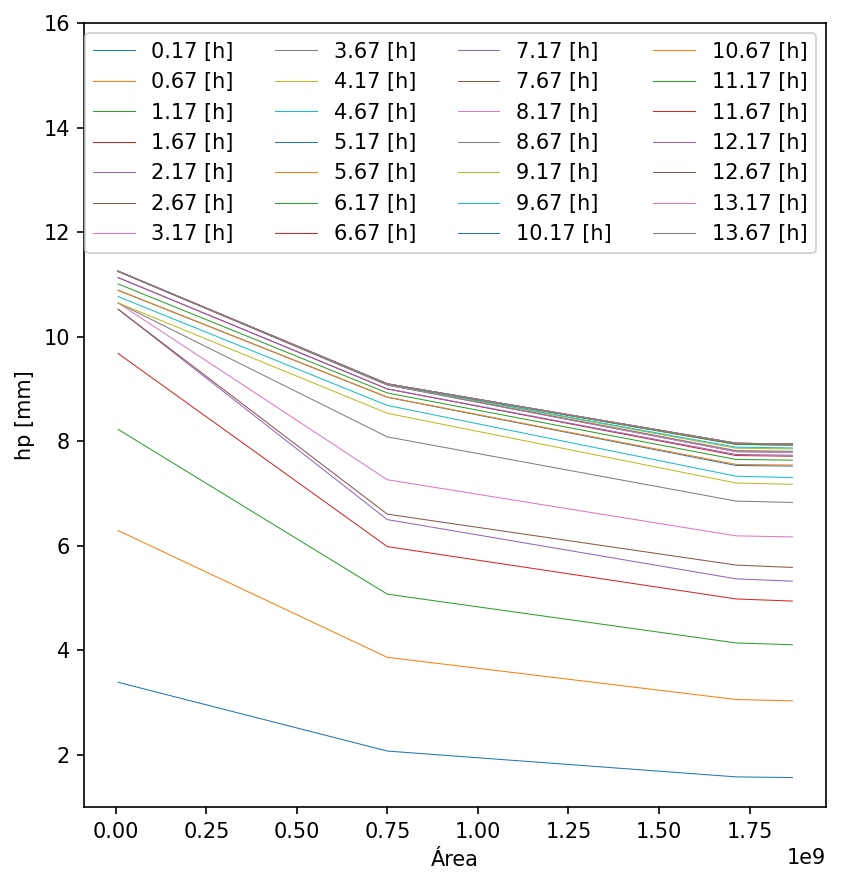

In [36]:
# Curvas h - a - d.

# Incializamos gráfica.
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(6, 6)
fig.set_dpi(150) 

# Graficamos una porción de las curvas h - a - d
h_a_d.iloc[ :, ::3 ].plot(ax = ax, linewidth = 0.5)

# Estilo.
handles, labels = ax.get_legend_handles_labels()
labels = [f"{float(x):.2f} [h]" for x in labels]
ax.legend(handles, labels, ncol = 4)
ax.set_ylim(1, 16)
ax.set_ylabel("hp [mm]")

fig.tight_layout()
plt.show()

In [37]:
# Interpolamos para una área.

# Escogemos el área.
A = Subcuenca.loc[0, "AREA"] / 2
# Posición del área dentro de la curva h - a - d.
i = ( h_a_d.index > A ).sum()

# Porcentaje de avance entre los dos valores de área.
p = ( ( A - h_a_d.index[i - 1] )
    / ( h_a_d.index[i] - h_a_d.index[i - 1] ) )

# Interpolación lineal.
precipitacion_A = ( ( h_a_d.iloc[i] - h_a_d.iloc[i - 1] )
    * p + h_a_d.iloc[i - 1] )

# Se le da formato a la tabla de curva masa.
precipitacion_A.name = "curva masa [mm]"
precipitacion_A.index.name = "tiempo [h]"
precipitacion_A[0.0] = 0
precipitacion_A = precipitacion_A.sort_index()
precipitacion_A = pd.DataFrame( precipitacion_A )

# Calculamos el hietograma.
precipitacion_A["hp [mm]"] = ( precipitacion_A["curva masa [mm]"]
    - precipitacion_A["curva masa [mm]"].shift(1) )
precipitacion_A.loc[0.0, "hp [mm]"] = 0
precipitacion_A["i [mm/h]"] = precipitacion_A["hp [mm]"] / dt

precipitacion_A

curva masa [mm]   hp [mm]   i [mm/h]
tiempo [h]                                      
0.000000           0.000000  0.000000   0.000000
0.166667           1.977317  1.977317  11.863900
0.333333           2.475903  0.498586   2.991519
0.500000           3.213178  0.737274   4.423646
0.666667           3.710452  0.497274   2.983644
...                     ...       ...        ...
13.333333          8.879242  0.000000   0.000000
13.500000          8.879242  0.000000   0.000000
13.666667          8.879242  0.000000   0.000000
13.833333          8.879242  0.000000   0.000000
14.000000          8.879242  0.000000   0.000000

[85 rows x 3 columns]

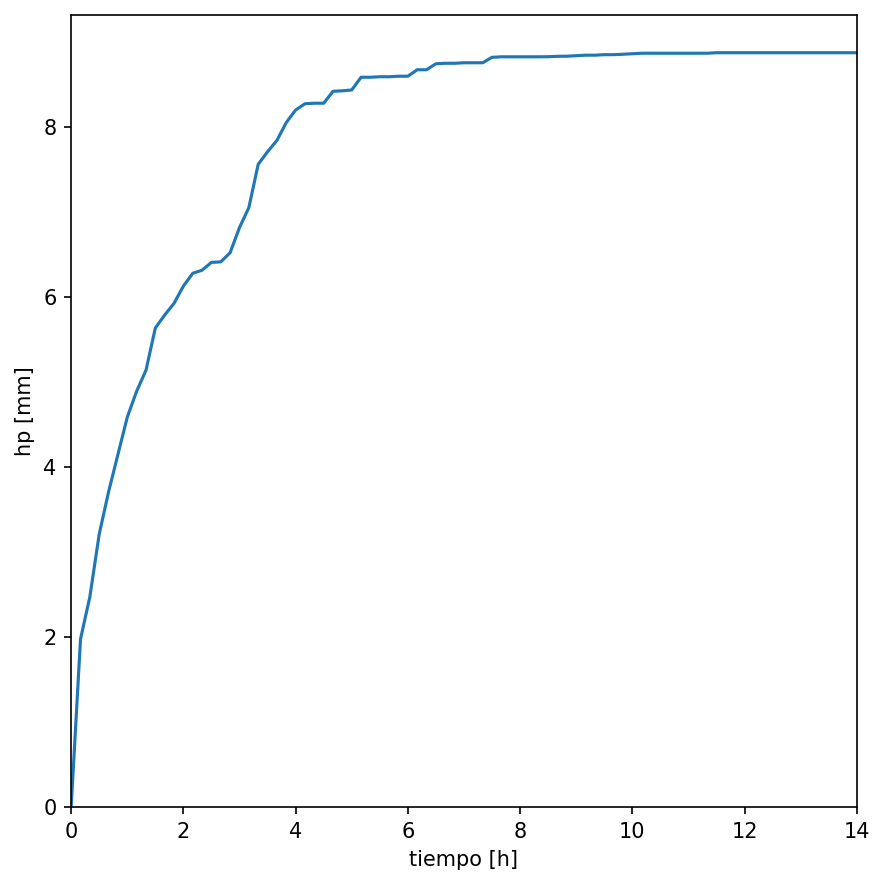

In [38]:
# Curva masa.

# Incializamos gráfica.
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(6, 6)
fig.set_dpi(150) 

# Graficamos la curva masa.
precipitacion_A["curva masa [mm]"].plot(ax = ax)

# Estilo.
ax.set_xlim(0, 14)
ax.set_ylim(0)
ax.set_ylabel("hp [mm]")

fig.tight_layout()
plt.show()

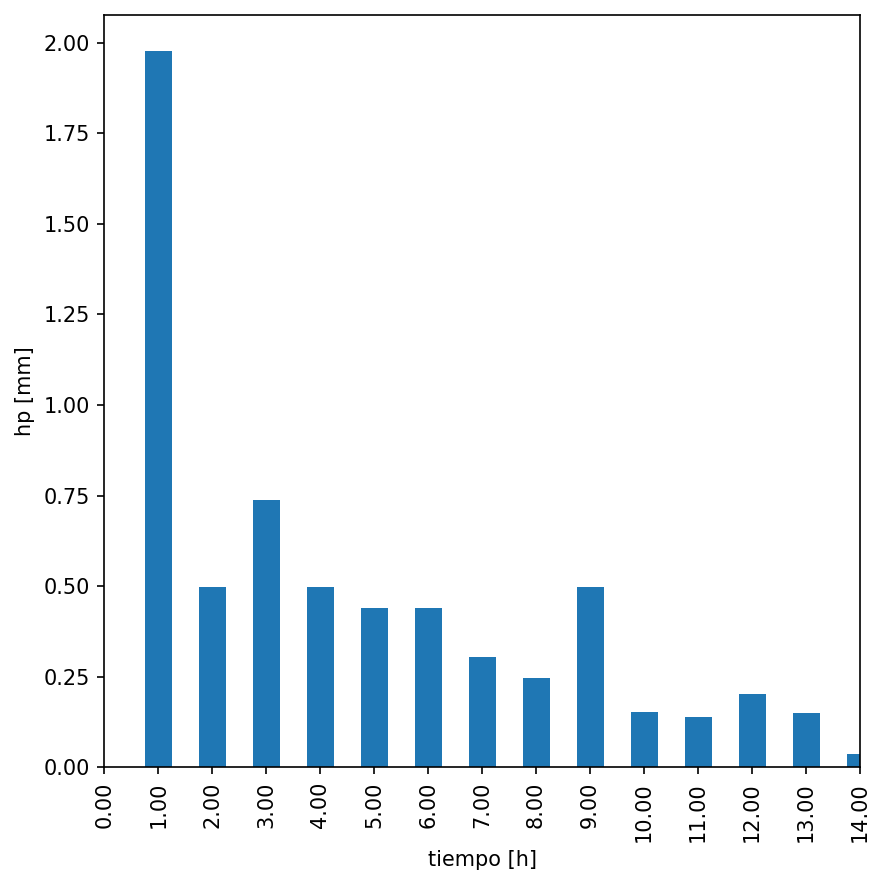

In [39]:
# Hietograma.

# Incializamos gráfica.
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(6, 6)
fig.set_dpi(150) 

# Graficamos el hietograma.
precipitacion_A["hp [mm]"].plot.bar(ax = ax)

# Estilo.
ax.set_xlim(0, 14)
ax.set_ylim(0)
ax.set_ylabel("hp [mm]")
ax.xaxis.set_major_formatter(plt.FormatStrFormatter("%.2f"))

fig.tight_layout()
plt.show()